Iteration 1: Wasted Space = 7446
Iteration 2: Wasted Space = 7446
Iteration 3: Wasted Space = 7446
Iteration 4: Wasted Space = 7446
Iteration 5: Wasted Space = 7446
Iteration 6: Wasted Space = 7446
Iteration 7: Wasted Space = 7446
Iteration 8: Wasted Space = 7446
Iteration 9: Wasted Space = 7446
Iteration 10: Wasted Space = 7446
Iteration 11: Wasted Space = 7446
Iteration 12: Wasted Space = 7446
Iteration 13: Wasted Space = 7446
Iteration 14: Wasted Space = 7446
Iteration 15: Wasted Space = 7446
Iteration 16: Wasted Space = 7446
Iteration 17: Wasted Space = 7446
Iteration 18: Wasted Space = 7446
Iteration 19: Wasted Space = 7446
Iteration 20: Wasted Space = 7446
Iteration 21: Wasted Space = 7446
Iteration 22: Wasted Space = 7446
Iteration 23: Wasted Space = 7446
Iteration 24: Wasted Space = 7446
Iteration 25: Wasted Space = 7446
Iteration 26: Wasted Space = 7446
Iteration 27: Wasted Space = 7446
Iteration 28: Wasted Space = 7446
Iteration 29: Wasted Space = 7446
Iteration 30: Wasted Sp

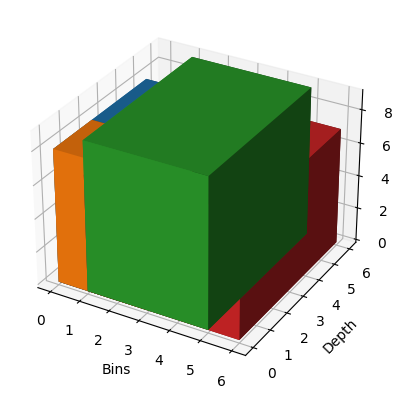

In [ ]:
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Define your problem-specific data and parameters
bin_dimensions = (20, 20, 20)  # Dimensions of the bin (width, height, depth)
items = [(2, 5, 8), (3, 2, 8), (4, 6, 9), (5, 6,7)] # Dimensions of items
initial_temperature = 100.0
cooling_rate = 0.99
max_iterations = 1000

# Function to generate an initial solution
def initial_solution():
    bins = []
    bin = {'items': [], 'remaining_space': bin_dimensions}

    for item in items:
        if item[0] <= bin['remaining_space'][0] and item[1] <= bin['remaining_space'][1] and item[2] <= bin['remaining_space'][2]:
            bin['items'].append(item)
            bin['remaining_space'] = (
                bin['remaining_space'][0] - item[0],
                bin['remaining_space'][1] - item[1],
                bin['remaining_space'][2] - item[2],
            )
        else:
            bins.append(bin)
            bin = {'items': [item], 'remaining_space': (
                bin_dimensions[0] - item[0],
                bin_dimensions[1] - item[1],
                bin_dimensions[2] - item[2],
            )}

    bins.append(bin)
    return bins

# Function to calculate the volume of wasted space in the bins
def wasted_space(bins):
    total_volume = bin_dimensions[0] * bin_dimensions[1] * bin_dimensions[2]
    used_volume = sum(item[0] * item[1] * item[2] for bin in bins for item in bin['items'])
    return total_volume - used_volume

# Simulated Annealing Algorithm
def simulated_annealing():
    current_solution = initial_solution()
    best_solution = current_solution
    temperature = initial_temperature

    for iteration in range(max_iterations):
        neighbor_solution = initial_solution()

        if wasted_space(neighbor_solution) < wasted_space(current_solution):
            current_solution = neighbor_solution
        else:
            delta = wasted_space(neighbor_solution) - wasted_space(current_solution)
            if random.random() < math.exp(delta / temperature):
                current_solution = neighbor_solution

        if wasted_space(current_solution) < wasted_space(best_solution):
            best_solution = current_solution

        temperature *= cooling_rate

        # Print the state of the solution at each iteration
        print(f"Iteration {iteration + 1}: Wasted Space = {wasted_space(current_solution)}")

    return best_solution

# Main
if __name__ == "__main__":
    best_solution = simulated_annealing()
    print("\nBest solution:")
    for i, bin in enumerate(best_solution):
        print(f"Bin {i + 1}: {bin['items']}")
def visualize_solution(bins):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, bin in enumerate(bins):
        for item in bin['items']:
            ax.bar3d(
                i,  # x-coordinate of the bar
                0,  # y-coordinate of the bar
                0,  # z-coordinate of the bar
                item[0],  # width of the bar
                item[1],  # depth of the bar
                item[2],  # height of the bar
                shade=True
            )

    ax.set_xlabel('Bins')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Height')
    plt.show()

# Main
if __name__ == "__main__":
    best_solution = simulated_annealing()
    print("Best solution:")
    for i, bin in enumerate(best_solution):
        print(f"Bin {i + 1}: {bin['items']}")

    visualize_solution(best_solution)

